In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp -r '/content/gdrive/My Drive/dataset' data/

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

In [0]:
# Initialising the CNN
classifier = Sequential()

In [0]:
classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32, (3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32, (3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
classifier.add(Flatten())

In [0]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [0]:
classifier.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   channel_shift_range = 100,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [44]:
training_set = train_datagen.flow_from_directory('/content/data/hotdogs/train',
                                                target_size = (64,64),
                                                batch_size =32,
                                                class_mode = 'binary')

Found 1502 images belonging to 2 classes.


In [45]:
test_set = test_datagen.flow_from_directory('/content/data/hotdogs/test',
                                            target_size = (64,64),
                                            batch_size= 32,
                                            class_mode='binary')

Found 535 images belonging to 2 classes.


In [46]:
loss_history = []
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

In [47]:
for i in range(10):
  loss_history += [classifier.fit_generator(training_set,
                         steps_per_epoch = 1502,
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 535)]

Epoch 1/1
1502/1502 [==============================] - 328s 219ms/step - loss: 0.5892 - acc: 0.6650 - val_loss: 0.6272 - val_acc: 0.7386
Epoch 1/1
1502/1502 [==============================] - 331s 220ms/step - loss: 0.2691 - acc: 0.8818 - val_loss: 1.0348 - val_acc: 0.7455
Epoch 1/1
1502/1502 [==============================] - 328s 218ms/step - loss: 0.0988 - acc: 0.9634 - val_loss: 1.4710 - val_acc: 0.7249
Epoch 1/1
1502/1502 [==============================] - 327s 218ms/step - loss: 0.0588 - acc: 0.9789 - val_loss: 1.5152 - val_acc: 0.7065
Epoch 1/1
1502/1502 [==============================] - 329s 219ms/step - loss: 0.0458 - acc: 0.9838 - val_loss: 1.4963 - val_acc: 0.7416
Epoch 1/1
1502/1502 [==============================] - 329s 219ms/step - loss: 0.0368 - acc: 0.9873 - val_loss: 1.5437 - val_acc: 0.7270
Epoch 1/1
1502/1502 [==============================] - 326s 217ms/step - loss: 0.0323 - acc: 0.9891 - val_loss: 1.5944 - val_acc: 0.7496
Epoch 1/1
1502/1502 [====================

10


Text(0.5, 1.0, 'Accuracy')

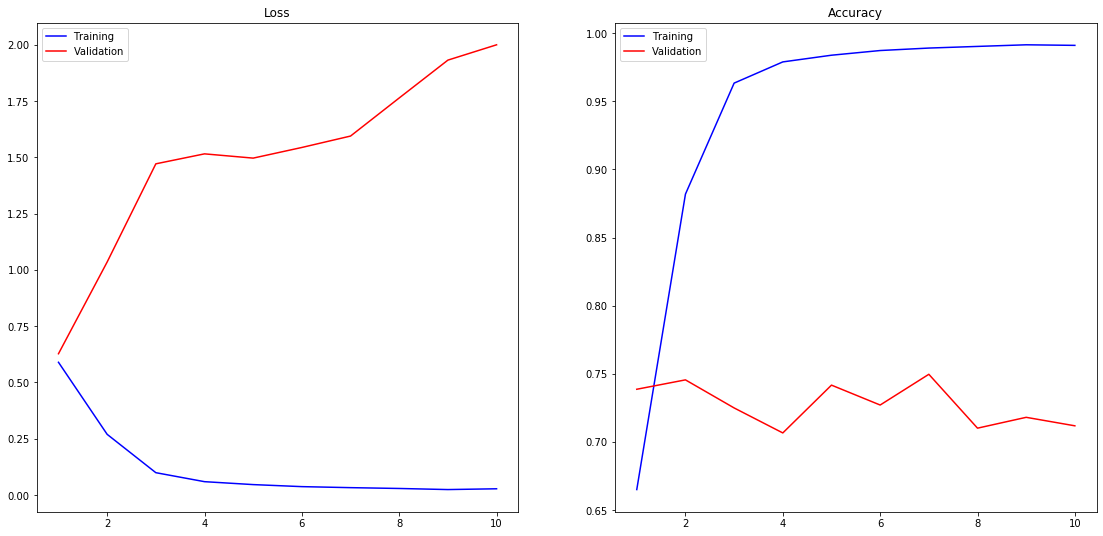

In [48]:
# visualization from:  https://www.kaggle.com/kmader/simple-cnn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

epich = np.cumsum(np.concatenate(
    [np.linspace(1, 1, len(mh.epoch)) for mh in loss_history]))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 9))
_ = ax1.plot(epich,
             np.concatenate([mh.history['loss'] for mh in loss_history]),
             'b-',
             epich, np.concatenate(
        [mh.history['val_loss'] for mh in loss_history]), 'r-')
ax1.legend(['Training', 'Validation'])
ax1.set_title('Loss')

_ = ax2.plot(epich, np.concatenate(
    [mh.history['acc'] for mh in loss_history]), 'b-',
                 epich, np.concatenate(
        [mh.history['val_acc'] for mh in loss_history]),
                 'r-')
ax2.legend(['Training', 'Validation'])
ax2.set_title('Accuracy')